# Introduktion till regressionsanalys i STATA

[English version](regression1_en.html)

Regressionsanalys är en av de vanligaste statistiska analyserna, och en av de mest flexibla. Den kan göras med två eller fler variabler, och användas för att undersöka en mängd olika typer av samband, med eller utan kontroll för alternativa förklaringar.

I princip handlar det dock om att passa in en linje till en mängd punkter. Formeln för "vanlig regressionsanalys" - Ordinary Least Squares (OLS) - gör det på ett väldigt bra sätt.

I den här guiden ska vi gå igenom den enklaste formen av regressionsanalys, där bara två variabler ingår, och intuitionen bakom analysen. Analysen kan sedan byggas ut på en mängd olika sätt, men det väntar vi med.

Vi börjar med att öppna en datamängd att analysera. I det här exemplet använder vi oss av en övningsdatamängd som finns förinstallerad i Stata. Den innehåller information om olika bilar - hur mycket bensin de drar, vad det är för modell, vad de väger, osv.

För att öppna denna träningsdatamängd skriver man i sin do-fil bara:

In [11]:
sysuse auto, clear

(1978 Automobile Data)


Det finns 12 olika variabler. Vi ska titta på det eventuella sambandet mellan hur många miles bilen kan köra på en gallon bensin och hur mycket bilen väger, i pund (det är amerikanska måttenheter). En rimlig hypotes är att tyngre bilar drar mer bensin, och därför kan köra färre miles per gallon. Vi kallar vikt vår oberoende variabel, och miles per gallon (mpg) den beroende. Vi tror att mpg beror på hur tung bilen är, men inte att bilens vikt avgörs av hur mycket bensin bilen drar.

Vi kan börja med att visualisera sambandet, att titta på analysenheterna, i en så kallad scatterplot. Det gör vi genom att skriva:


(note: file /Users/anderssundell/.stata_kernel_cache/graph3.svg not found)


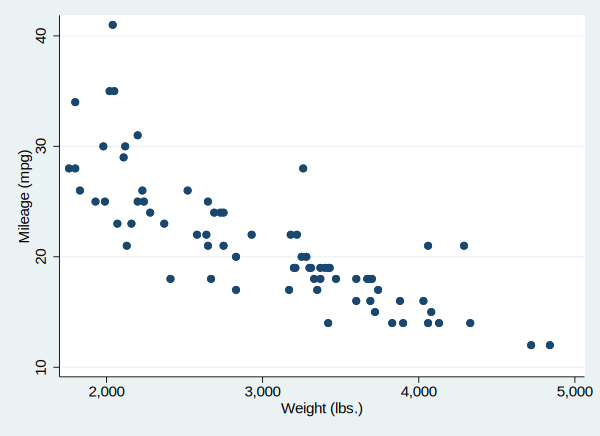

In [12]:
twoway (scatter mpg weight)

Varje prick motsvarar här alltså en bil, som är inplacerad på den vågräta axeln efter hur mycket bilen väger, och på den lodräta axeln efter hur många miles per gallon den orkar. Det finns en viss spridning, men också ett mönster: Prickar längre till höger i grafen är placerade längre ned. De allra tyngsta bilarna orkar inte mer än ungefär 11-12 miles per gallon. Motsatt så ser vi att den bil som kan köra längst på en gallon (och som alltså ligger längst upp i diagrammet) är förhållandevis lätt, kring 2000 pund (lbs).

**Vi kan visualisera det samband vi kan ana** - att tunga bilar kan köra färre miles per gallon - genom att rita ut en linje. Vi låter Stata "passa in" linjen så bra det går. Mer specifikt försöker Stata minimera avståndet i höjdled från linjen till varje punkt. Ännu mer specifikt är det det kvadrerade (squared) avståndet som ska minimeras, därav namnet på formeln: Ordinary Least Squares. [På den här sidan](http://setosa.io/ev/ordinary-least-squares-regression/) finns det bra interaktiva visualiseringar av hur det går till.

För att rita ut linjen lägger vi till ett till lager i vår punktgraf. I det första lagret visas punkterna. I det andra lagret drar vi vår linje, med kommandot lfit. Varje lager får en egen parentes i grafkommandot. Såhär ser det ut:


(note: file /Users/anderssundell/.stata_kernel_cache/graph5.svg not found)


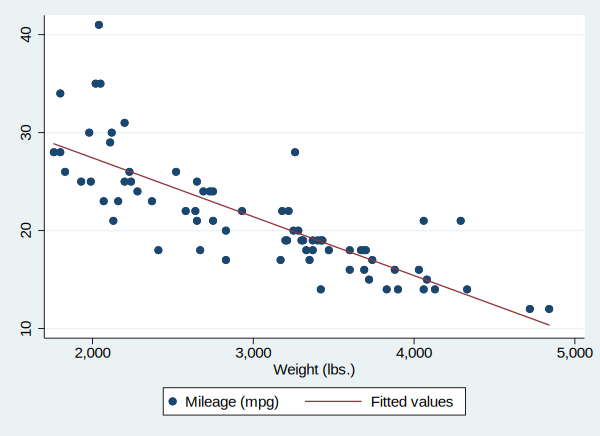

In [15]:
twoway (scatter mpg weight) (lfit mpg weight)

Linjen är nu den bästa möjliga. Om vi skulle vinkla den annorlunda, eller flytta den upp eller ner i diagrammet, skulle det sammanlagda avståndet till punkterna öka. Det här är den så kallade regressionslinjen.

Eftersom den lutar nedåt åt höger är det ett så kallat negativt samband. Mer av den ena variabeln (vikt) hänger ihop med mindre av den andra (miles per gallon). Mer av miles per gallon hänger också ihop med mindre vikt.

**Regressionsanalys är helt enkelt att sätta siffror på den här linjen.** I en regressionsanalys får vi framförallt ut lutningskoefficienten, dvs hur mycket linjen lutar upp eller ner. Sen får vi också ut något som kallas intercept eller konstant, vilket visar var linjen hamnar på den lodräta axeln när vi är vid 0 på den vågräta axeln. Alternativt uttryckt: Vad genomsnittsvärdet är på den beroende variabeln, när alla de oberoende variablerna är noll.

För att göra en regressionsanalys på de här två variablerna skriver vi:

In [16]:
reg mpg weight


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(1, 72)        =    134.62
       Model |   1591.9902         1   1591.9902   Prob > F        =    0.0000
    Residual |  851.469256        72  11.8259619   R-squared       =    0.6515
-------------+----------------------------------   Adj R-squared   =    0.6467
       Total |  2443.45946        73  33.4720474   Root MSE        =    3.4389

------------------------------------------------------------------------------
         mpg |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      weight |  -.0060087   .0005179   -11.60   0.000    -.0070411   -.0049763
       _cons |   39.44028   1.614003    24.44   0.000     36.22283    42.65774
------------------------------------------------------------------------------


Principen är alltså regressionskommandot "reg", följt av den beroende variabeln "mpg" och sedan en lista på alla de oberoende variablerna (i det här fallet bara "weight").

Tabellen kan se lite skräckinjagande ut, men det är inte alla siffror som är lika relevanta. Det viktigaste hittar vi i tabellen längst ner, framförallt i raden "weight." **I kolumnen "Coef." ser vi den viktigaste siffran, lutningskoefficienten.** Den visar hur mycket linjen lutar, uttryckt som *hur mycket upp eller ner vi hamnar på den beroende variabeln om vi ökar den oberoende variabeln med ett steg*.

I det här fallet är det -.006. Det betyder att en bil som väger ett pund mer i genomsnitt kommer .006 färre miles för varje gallon bensin. Det betyder också att en bil som väger 1000 pund mer kommer 6 miles kortare per gallon. Exakt detta syns i diagrammet med linjen ovan.

I raden "cons" ser vi vad det så kallade interceptet är. Det är genomsnittsvärdet för den beroende variabeln när alla de oberoende variablerna är noll. Alltså, hur många miles per gallon en bil som väger 0 pund kan köra: 39.44. Så är det naturligtvis inte i verkligheten - inga bilar väger så lite. Men det gör inget. Det är bara det värde vi får ut om vi drar ut den röda linjen i diagrammet en bit åt vänster. Vi behöver inte tolka det på något särskilt sätt.

Slutligen kan vi också kolla på siffran som står till höger om "R-squared", uppe till höger i outputen. Värdet är här 0.6515. R-square är ett mått som går från 0 till 1 och visar hur bra vår linje passar till punkterna. Ju mer spridda punkterna är kring linjen, desto lägre värde. Ju närmare de är samlade kring linjen, desto högre värde.

Man kan också tolka värdet som andelen förklarad varians. I det här fallet förklaras 65,15% av variationen i miles per gallon av variabeln vikt. Vikt är alltså en viktig förklaring till varför bilar kommer olika långt på en gallon bensin, även om det också finns annat som påverkar (R-squared är inte 1).

## Avslutning

Svårare än så är inte regressionsanalys i sin enklaste form. Det handlar om att passa in en linje till ett gäng punkter, och så får vi information om linjen - hur mycket den lutar upp eller ned, vart den börjar, och hur väl den passar till punktsvärmen.

Rent konkret använder vi den till att undersöka samband mellan olika variabler, och om det evntuella sambandet är starkt eller svagt. I exemplet såg vi att det fanns ett negativt samband: bilar med mycket vikt har lite miles per gallon. Bilar med mycket miles per gallon har lite vikt.

Sen kan vi använda regressionsanalysen för att kontrollera för andra variabler. Till exempel skulle man kunna tänka sig att vissa bilmärken generellt sett är tyngre, och drar mer bensin. I så fall skulle det kunna hända att det inte är en vikteffekt, utan en märkeseffekt. Vi kan också kolla på signifikansnivåer och konfidensintervall för att se hur generaliserbara resultaten är till en större population. Men det är egna inlägg.